# Assignment 1: Sentiment Polarity for Movie Reviews
 
*version 2021.1, details/bugs in this assignment might be patched, you will be notified if this happens*

For this assignment, you will implement a classification pipeline for a binary sentiment classification task. The provided dataset includes movie reviews labelled as either positive or negative. Your starting point for the assignment is an implementation of the full pipeline that uses scikit learn and example data.

In most real-world situations, you will have good (and relatively bug free) tools at your disposal. However, for being able to be creative with an ML problem, it is crucial to understand the inner workings of the full pipeline. You will therefore re-implement the model, feature extraction, the learning algorithm, the prediction algorithm, and a simple grid search for hyper parameters. You will find re-implementation tasks marked "implementation task" (in bold) below. In your submission, all code must be written from scratch by you. While you can use the base modules of python (os, string etc) and NumPy, you cannot use sklearn or any equivalent ML library (when in doubt, ask about imports).

## Submission
 
Please submit your code as a notebook through studium. You should include the following:
 
1. A working implementation of your pipeline, reproducing your principal results when run. Please rerun your notebook as the last thing you do before submitting.
2. Comment the code properly, especially for longer or opaque functionality. Please try to write self documenting code (i.e., choosing descriptive variables names, refactoring to isolate functionality, minimal code duplication etc).
3. A *brief* description (100-200 words in total) of the implementation work that was necessary to complete the different parts, showing how you arrived at your solution and design choices made. You can spread these in the notebook or put them in one place.
4. Comments on what you thought was hard in the assignment, what you think was educational, what took most time and which parts might be unnecessarily tricky.
5. As the submission is anonymous, **all personal information must be removed**.
6. Apart from sections and titles, please remove all unnecessary text and code from the notebook you hand in. Keep only that which strengthens the case that you fulfil the listed requirements. All notebooks containing unnecessary chunks of text from this instruction will receive a U.


## Requirements for grade G

To achieve a pass (G) in this assignment, you must solve the following tasks without serious errors.

1. Reimplement the four parts of the assignment. The instructions below will guide you on specifics for each part.
2. When evaluating your model, split the data into a training and a test set. This split can be selected non-randomly before running any training. The split should be 80/20 (i.e., 1600 training documents and 400 test documents). *It is easier for you if the classes are balanced.*
3. Implement the model as a class following the sklearn API as:
```
class model:
  def __init__(self, learning_rate, ...):
    ...

  def fit(self, X, y):
    ...

  def predict(self, X):
    ...

  def score(self, X, y):
    ...
```
4. Include a short (150 words) qualitative analysis in your submission. Discuss the final decision boundary (e.g., why did this word contribute to a negative label etc), the selected hyper-parameters, and design choices.


### Additional requirements for grade VG
 
To achieve a pass with distinction (VG) in this assignment, you must adequately solve the tasks above. In addition, you must:

1. Implement the optimization as *stochastic* gradient descent (SGD)
2. Implement a [tf-idf](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) feature model and compare classification performance to bag-of-words (this should also be discussed in your qualitative analysis). Choose your preferred formulation of tf-idf from the literature, but motivate it (in a few sentences).
3. Implement and discuss [momentum](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Momentum) in the SGD optimization.
4. Implement and discuss [RMSProp](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp) in the SGD optimization.
5. Implement and discuss [10-fold cross validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k-fold_cross-validation) for evaluating your model.
6. Write a longer qualitative analysis (ca 600 words) of your pipeline and results, including some visualization (you can use UMAP or PCA from sklearn for this). The analysis and claims must be essentially correct.

## General advice

The task is to predict, for an unseen review, whether it is positive or negative. This is a binary classification task. Work from the given code and change one piece at a time, ensuring functionality throughout your work. You should test your code every couple of lines to make sure your assumptions on functionality and variable content is correct. A good rule of thumb is that a coder will introduce a bug every five lines (even as a professional).

To make sure your code does what it is supposed to do, use ```assert``` statements to check your assumptions. Keep the given asserts if you need them. Professional coders sometimes start with writing tests for some functionality instead of starting with the functionality itself. This is called *test-driven development*.

## Plagiarism
 
In code assignments, plagiarism is a tricky concept. A clean cut way would be to demand that you write all the code yourself, from memory, with only the assigned literature as help. This is not how code is developed professionally. It is common to copy and share. However, since this is a learning exercise, you must implement everything on your own, but please look at the course repo, Stack Overflow etc. Moreover, discuss with course mates and TAs to find inspiration and solutions. Code that is *obviously* copied (with minor modifications) will be considered as plagiarized. As a part of the examination, you might be asked to explain any particular part of the functionality in your implementation.

## Part 1: Parsing the dataset

For this assignment, we use the [Review polarity v2.0](http://www.cs.cornell.edu/people/pabo/movie-review-data/) data set created by Bo Pang and Lillian Lee at Cornell University. It consists of 2000 movie reviews, 1000 of which are positive and 1000 are negative. *Always check the readme for any dataset before using it.*

The following downloads the dataset (if it's not already present).

In [1]:
!wget -N http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz

--2021-04-08 09:45:40--  http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz
Resolving www.cs.cornell.edu (www.cs.cornell.edu)... 132.236.207.36
Connecting to www.cs.cornell.edu (www.cs.cornell.edu)|132.236.207.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3127238 (3.0M) [application/x-gzip]
Saving to: ‘review_polarity.tar.gz’

review_polarity.tar 100%[===================>]   2.98M  2.76MB/s    in 1.1s    

2021-04-08 09:45:42 (2.76 MB/s) - ‘review_polarity.tar.gz’ saved [3127238/3127238]



In order to get the given code to work, a part of the 20 newsgroup dataset is loaded below. This should be replaced by your parsing code in your final submission.

In [2]:
from sklearn.datasets import fetch_20newsgroups
X_raw, y = fetch_20newsgroups(subset='train', categories=['rec.sport.baseball', 'rec.sport.hockey'], remove=('headers', 'footers', 'quotes'), return_X_y=True)
y[y==0]=-1

In [3]:
import numpy as np

# assert len(X_text) == 2000
assert np.all([isinstance(x, str) for x in X_raw])
assert len(X_raw) == y.shape[0]
assert len(np.unique(y))==2
assert y.min() == -1
assert y.max() == 1

**Implementation task:** Implement a parser for the dataset. The output should be a list/array of strings (`X_raw`) and a list/array of labels (`y`) encoded as {-1,1}.



## Part 2: Feature extraction
 
As basic features, we use a binary bag-of-words (BOW) representation of the words in each review. Each review in the data set is described by a vector with one element corresponding to each word in the vocabulary. An element is set to 1 if the review contains its associated word, otherwise it is set to 0.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_raw)             # Creates the vocabulary of the vectorizer

X = vectorizer.transform(X_raw)
X = X.todense()                   # sklearn will output a sparse matrix
X[X>1] = 1                        # Turns the count vectors into binary vectors

ordered_vocabulary = vectorizer.get_feature_names()
vocabulary = set(ordered_vocabulary)

If needed, we can do lookup tables going from tokens to feature numbers. Note that most of the elements in any feature vector will be zero.

In [5]:
lut = dict()
for i, word in enumerate(ordered_vocabulary):
  lut[word] = i

for word in ['dolphin', 'the', 'coffee']:
  if word in vocabulary:
    print("'%s' is represented as feature dimension %i" %(word, lut[word]))
  else:
    print("'%s' is not in the vocabulary" % word)

'dolphin' is not in the vocabulary
'the' is represented as feature dimension 12700
'coffee' is represented as feature dimension 3639


**Implementation task:** You should re-implement the feature extraction above. The list/array called `ordered_vocabulary` should contain the words for each feature dimension and X should contain the BOW binary vectors. 

*Hints: Implementing X a numpy array will make your life easier in the comming parts. Also, the `in` operator is way faster for sets than for lists.*
 
We can now look at the data and the words corresponding to feature dimensions.

In [6]:
print(ordered_vocabulary[2000:2010])
print(X[:10, 2000:2010])
for w in ['dolphin', 'the', 'coffee']:
  print("'%s' in words: %s" % (w, w in vocabulary))

['annoying', 'annoys', 'annual', 'anointed', 'another', 'anoynamous', 'anson', 'answer', 'answered', 'answers']
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
'dolphin' in words: False
'the' in words: True
'coffee' in words: True


At this point in the code, X and y are ready for the supervised learning task.

## Part 3: Learning framework 
 
The model we will use is a simple hyperplane. This plane will represent the decision boundary through the data space, separating positive from negative ratings.
 
**Implementation task:** You should implement your versions of the following parts (you can also find this in the slides):
 
1. **Hyperplane model**. The model should be a hyperplane as $f(x, \omega) = sgn(\omega^\top x)$. Note that $x_0$ in this notation is the pseudo input 1. When evaluated, this gives us the predicted results as $\hat y_i = f(x_i, \omega^{(t)})$, where $\omega^{(t)}$ is the parameter vector at optimization iteration t and $\omega^{(0)}$ is the initial guess for the parameter vector.
 
2. **Objective function.** Hinge loss with $l_2$ regularization.

  $\mathfrak{L}_{hinge}(y, \hat y) = \frac{\lambda}{2} ||\omega|| + \sum_i \max(0, 1-y_i \cdot \hat y_i)$.

  Regularization is simply adding a norm on the parameter vector and including that in the objective function. For the $l_2$ norm this is defined as $\sqrt{\sum_{i=1}^n \omega_i^2}$. The regularization always has some attenuation parameter $\lambda \in \mathbb{R}$ keeping it from dominating the objective function.

3. **Gradient descent**. The update for gradient descent looks like $\omega^{(t)} = \omega^{(t-1)} - \gamma \nabla \mathfrak{L}(\omega^{(t-1)})$, where the update is defined as $\nabla \mathfrak{L} = \left ( \frac{\partial \mathfrak{L}}{\partial \omega_0}, \frac{\partial \mathfrak{L}}{\partial \omega_1}, \ldots, \frac{\partial \mathfrak{L}}{\partial \omega_n} \right )^\top$. The gradient $\nabla \mathfrak{L}$ is given analytically as:

  $\frac{\partial \mathfrak{L}(\omega|X, Y)}{\partial \omega}
=\lambda \theta + \sum_{i=1}^{|X|}
\begin{cases}
0 & \text{if } y_i \omega^\top x_i \geq 1\\ 
-y_i x_i & \text{else}
\end{cases}$

 The learning rate $\gamma \in \mathbb{R}$ acts as a dampening factor on the gradient update. This should run until some stopping criteria is met (e.g.,$\omega^{(t+1)}\approx \omega^{(t)}$). The default stopping criterion for `SGDClassifier` is when $loss_{current} > loss_{best} - .001$ for five consecutive iterations.

*Note that while your code will be runnable, it will likely be much slower than sklearn's code.*

In [7]:
from sklearn.linear_model import SGDClassifier

# Set hyperparameters (these variables are only here for clarity)
reguliser_dampening = 0.001
learning_rate = .1

# Create the untrained classifier
model = SGDClassifier(loss='hinge', penalty='l2',
                      alpha=reguliser_dampening, verbose=1,
                      learning_rate='constant', eta0=learning_rate)

# Train the classifier
model.fit(X, y)

# Get the parameter vector
omega = np.concatenate([model.intercept_, model.coef_.ravel()])

-- Epoch 1
Norm: 12.83, NNZs: 5663, Bias: -0.700000, T: 1197, Avg. loss: 0.551948
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 13.89, NNZs: 6230, Bias: -0.600000, T: 2394, Avg. loss: 0.172441
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 14.34, NNZs: 6638, Bias: -0.600000, T: 3591, Avg. loss: 0.122829
Total training time: 0.14 seconds.
-- Epoch 4
Norm: 13.96, NNZs: 6756, Bias: -0.600000, T: 4788, Avg. loss: 0.079171
Total training time: 0.17 seconds.
-- Epoch 5
Norm: 13.76, NNZs: 6866, Bias: -0.400000, T: 5985, Avg. loss: 0.073550
Total training time: 0.21 seconds.
-- Epoch 6
Norm: 13.28, NNZs: 6932, Bias: -0.500000, T: 7182, Avg. loss: 0.059039
Total training time: 0.24 seconds.
-- Epoch 7
Norm: 13.16, NNZs: 7043, Bias: -0.700000, T: 8379, Avg. loss: 0.066233
Total training time: 0.27 seconds.
-- Epoch 8
Norm: 12.87, NNZs: 7089, Bias: -0.600000, T: 9576, Avg. loss: 0.057915
Total training time: 0.30 seconds.
-- Epoch 9
Norm: 13.05, NNZs: 7181, Bias: -0.500000, T: 10773, A

In the above training with verbose=1, note how the loss etc are changing. For your implementation, it can be very good to print out lots of information so that you can see if you get what you expect (e.g. a lowering of the loss).
 
We can examine the weights by plotting them. Think about how to interpret these weights.

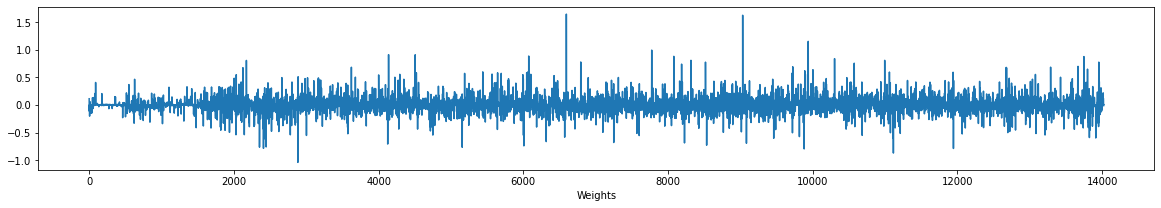

In [8]:
import matplotlib.pyplot as plt
 
plt.figure(figsize=(20, 3))
plt.plot(omega[1:])
plt.xlabel("Value")
plt.xlabel("Weights")
plt.show()

From the same information, we can plot the words with the strongest influence. Can you see a pattern? Is the model over learning on some words? Why might word frequency be important when analysing their impact?



In [9]:
assert (len(omega)-1) == len(vocabulary)

# Sort by absolute value
idx = np.argsort(np.abs(omega[1:]))

print("                Word   Weight  Occurences")
for i in idx[-20:]:   # Pick those with highest 'voting' values
  print("%20s   %.3f\t%i " % (ordered_vocabulary[i], omega[i+1], np.sum([ordered_vocabulary[i] in d for d in X_raw])))

                Word   Weight  Occurences
                 ice   0.778	188 
            baseball   -0.785	102 
                 sox   -0.788	3 
            pitching   -0.796	56 
                 ass   0.806	152 
               roger   0.807	0 
                mask   0.808	13 
                puck   0.838	35 
                runs   -0.871	77 
               wings   0.876	6 
                lssu   0.880	0 
               goals   0.885	54 
             detroit   0.908	1 
                 cup   0.910	17 
               leafs   0.992	1 
              braves   -1.040	1 
             playoff   1.132	104 
            playoffs   1.151	71 
                 nhl   1.623	1 
              hockey   1.644	129 


## Part 4: Exploring hyperparameters
 
For optimization of the hyperparameters, you can search for value on a grid. Trying all combinations is called grid search and can be implemented with nested `for` loops. A faster alternative is to sample from the grid. Sampling is now as thorough but most often sufficient, and much faster. Following the current consensus on ML methodology, we must at least split off a test set before exploring any configuration and use this data only at the very end of the experiment.
 
**Implementation task:** Implement code for printing a sorted table of your sampled hyperparameters. To accomplish this, you must change the code above to store your evaluations (with loss/accuracy) of different hyperparameter sets.

The final code call below evaluates the estimated best hyperparameter set on the test set.

1. **Learning rate**. Try different settings of the learning rate. It is useful to pick values from an exponentially spaced grid (e.g., 0.0001/0.0003/0.001/0.003/0.01/0.03/0.1/0.3/1.0/3.0) where each of the values is about 3 times as large as the previous one. Note what happens when the learning rate gets too small or too large. The best learning rate is as large as possible, but still reliable and stable.
 
3. **Regulariser dampening**. Try to find how much the regulariser needs to be dampened to get a good score. Use an exponentially spaced grid here as well.
 

The grid points can be generated as `np.exp(np.linspace(np.log(0.0001), np.log(3), 10)`. For these real valued hyperparameters, you can add extra points if you find a promising interval. Note that trying every combination of hyperparameters is likely not feasible, but don't hesitate to try.
 
Once you’ve settled on a final set of hyperparameters that work well/decently (and only then!), use the test set and rerun to obtain an accuracy score on the test set.

In [10]:
from sklearn.model_selection import train_test_split

# Splitting of the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
from sklearn.model_selection import ParameterSampler

# Define the parameters
parameter_distribution = {'learning_rate': np.exp(np.linspace(np.log(0.0001), np.log(3), 10)),
                          'reguliser_dampening': np.exp(np.linspace(np.log(0.0001), np.log(3), 10))}

# Placeholder to make future comparissons easier
best_hyperparameters = None
print("Learning rate:\tReg.dampening:\tTraining set accuracy:")

for hyperparameters in ParameterSampler(parameter_distribution, n_iter=10):
  # Set up the classifier
  reguliser_dampening = hyperparameters['reguliser_dampening']
  learning_rate = hyperparameters['learning_rate']
  model = SGDClassifier(loss='hinge', penalty='l2',
                        alpha=reguliser_dampening, verbose=0,
                        learning_rate='constant', eta0=learning_rate)

  # Train the classifier
  model.fit(X_train, y_train)

  # Calculate the training accuracy    
  training_accuracy = np.sum(model.predict(X_train)==y_train)/len(y_train)

  # Store the hyperparameters if they are better than what we have found before
  if best_hyperparameters is None or best_hyperparameters[1] < training_accuracy:
    best_hyperparameters = (hyperparameters, training_accuracy)
  print("%.5f\t\t%.5f\t\t%.1f%%" % (hyperparameters['learning_rate'], hyperparameters['reguliser_dampening'], 100*training_accuracy))

best_learning_rate = best_hyperparameters[0]['learning_rate']
best_reguliser_dampening = best_hyperparameters[0]['reguliser_dampening']
print("Best parameters: %.5f, %.5f" % (best_learning_rate, best_reguliser_dampening))

Learning rate:	Reg.dampening:	Training set accuracy:
0.09655		0.00099		98.4%
0.00031		0.00311		95.4%
3.00000		0.95425		50.4%
0.95425		0.30353		50.6%
3.00000		0.30353		50.4%
0.00311		0.09655		88.1%
0.00031		0.00031		95.5%
3.00000		3.00000		50.4%
0.30353		0.00031		98.0%
0.00010		3.00000		76.5%
Best parameters: 0.09655, 0.00099


We can now run the final model.

In [14]:
# Set up the classifier
model = SGDClassifier(loss='hinge', penalty='l2',
                      alpha=best_reguliser_dampening, verbose=0,
                      learning_rate='constant', eta0=best_learning_rate)

# Train on all the non-test data
model.fit(X_train, y_train)

# Run prediction on the test set
test_accuracy = np.sum(model.predict(X_test)==y_test)/len(y_test)

print("Test set accuracy %.1f%%" % (100*test_accuracy))

Test set accuracy 86.7%


Is this a good result? What is a good result?

